# Assignment 1 for CS5783
Shengfang Ma      09/15/2022 
      

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#mount Google Drive and give mounted Drive paths below
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#define a function to calculate theta parameter from normal equation
def thetaEquat(X,y):
  X_T = np.transpose(X)
  X_inverse = np.linalg.pinv(np.dot(X_T,X))
  theta = np.dot(np.dot(X_inverse,X_T),y)

  return theta


In [4]:
#define a function to calculate the ordinary least squares error (cost function )
def costfunc(y_simu, y_truth):
  error = (sum(np.power((y_simu-y_truth),2)))/2
  return error

# Question 1

#Report for Problem1

From the training data, we can see that the relationship between x_train and y_train is not linear. It looks like a 5-degree polynomial. The relationship should be able to be simulated well with a 5th order basis function. After visualizing the testing data, we can see the relationship between x_test and y_test is not linear either. But unlike the training data, the relationship between test variables is more like a cubic polynomial. The size of the data is not big, so normal equations can be used to calculate the parameters.
I first choose linear regression without basis function to simulate a linear relationship between x and y. The cost function of the linear regression without basis function is 1.41, which means it is not a good fit. Aslo prove the relationship between x and y is not linear.
Then I choose a 3rd order basis function for the linear regression based on the visualization analysis of the testing data. Two new features: x^2  ,and x^3, calculated from x_train, are added to simulate the hypothesis function. However, the result of a 3rd order basis function turn out a big error. The cost function is 39.48. It's not fit the test data at all. 
At last I tried a 5th order basis function according to the visualization of the training data.Two more features: x^4  ,and x^5, calculated from x_train, are added to simulate the hypothesis function. The result is a great fit to the test data. The error is almost 0.

In [5]:
# training file path
x_train_file = '/content/drive/MyDrive/x_train.npy'
y_train_file = '/content/drive/MyDrive/y_train.npy'

#testing file path
x_test_file = '/content/drive/MyDrive/x_test.npy'
y_test_file = '/content/drive/MyDrive/y_test.npy'


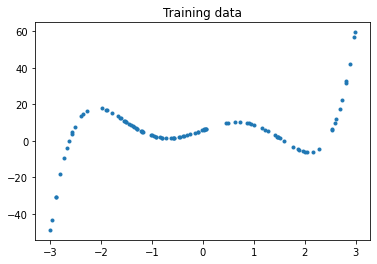

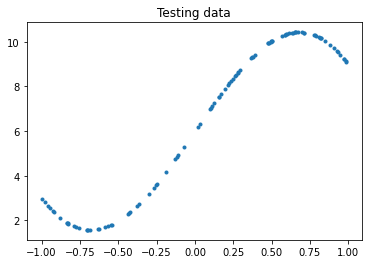

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# read the training data
x_train = np.load(x_train_file)
y_train = np.load(y_train_file)

#get the size of training data
len_train = len(x_train)

# create vector x0 with value 1 for regression
x0 = np.ones((len_train, 1))  # add x0 for bias

#visualize the training data
plt.plot(x_train, y_train,'.')
plt.title('Training data')
plt.show()

# read the test data
x_test = np.load(x_test_file)
y_test_truth = np.load(y_test_file)
#visualize the test data
plt.title('Testing data')
plt.plot(x_test, y_test_truth,'.')
plt.show()


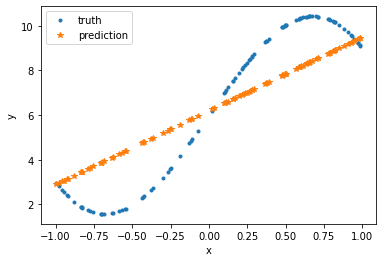

The average error of linear regression is:  [1.40992327]


In [7]:
#1. Try a linear regression without basis function

# concatenate x0 and x_train to make the trainxing X matrix
Xtrain = np.concatenate((x_train,x0), axis = 1)

# use normal equation to calculate theta  
theta = thetaEquat(Xtrain, y_train)

# use theta to simulate y from test data
Xtest = np.concatenate((x_test,x0), axis = 1)
y_test_sim = np.dot(theta,(np.transpose(Xtest)))  #prediction of y

#plot truth test_y and simulated test_y
plt.plot(x_test, y_test_truth,'.',label ='truth')
plt.plot(x_test, y_test_sim,'*',label ='prediction')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
#plt.plot(x_test, (y_test_sim[:,None] -y_test_truth), 'o')
plt.show()

#calculate prediction error ((ordinary least squares))
error = costfunc(y_test_sim[:,None], y_test_truth)
print('The average error of linear regression is: ', error/(y_test_truth.shape[0]))

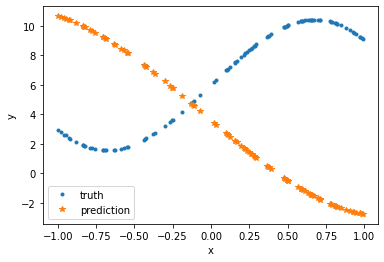

The error of linear regression is:  [39.4859096]


In [8]:
#Try linear regression with a 3rd order basis function
#create x with size of (100, 4) for the features

# add the square ot training x
x2 = np.power(x_train, 2)
# add the cube ot training x
x3 = np.power(x_train, 3)  

# concatenate x0 and x_train to make the trainxing X matrix
Xtrain = np.concatenate((x_train,x2,x3, x0), axis = 1)

# use normal equation to calculate theta  
theta = thetaEquat(Xtrain, y_train)

# use theta to simulate y from test data
x2 = np.power(x_test, 2)
x3 = np.power(x_test, 3)  
Xtest = np.concatenate((x_test,x2,x3,x0), axis = 1)
y_test_sim = np.dot(theta,(np.transpose(Xtest)))  #prediction of y

#plot truth test_y and simulated test_y
plt.plot(x_test, y_test_truth,'.',label ='truth')
plt.plot(x_test, y_test_sim,'*',label ='prediction')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
#plt.plot(x_test, (y_test_sim[:,None] -y_test_truth), 'o')
plt.show()

#calculate prediction error ((ordinary least squares))
error = costfunc(y_test_sim[:,None], y_test_truth)
print('The error of linear regression is: ', error/(y_test_truth.shape[0]))

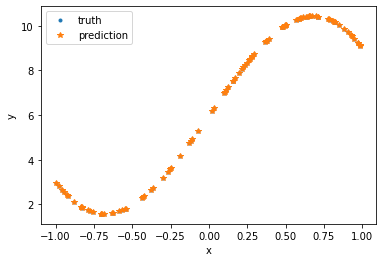

The error of linear regression is:  [9.39066254e-26]


In [9]:
#Implement linear regression with a 5th order basis function
#create x with size of (100, 6) for the features
x2 = np.power(x_train, 2)  # add the square of training x
x3 = np.power(x_train, 3)  # add the cube of training x  
x4 = np.power(x_train, 4)  # add the 4th power of training x
x5 = np.power(x_train, 5)  # add the 5th power of training x
# concatenate x0 and x_train to make the trainxing X matrix
Xtrain = np.concatenate((x_train,x2,x3,x4,x5, x0), axis = 1)

# use normal equation to calculate theta  
theta = thetaEquat(Xtrain, y_train)

# use theta to simulate y from test data
x2 = np.power(x_test, 2)  # add the square ot test x
x3 = np.power(x_test, 3)  # add the cube ot test x
x4 = np.power(x_test, 4)  # add the 4th power ot test x
x5 = np.power(x_test, 5)  # add the 5th power ot test x

Xtest = np.concatenate((x_test,x2,x3,x4,x5,x0), axis = 1) #concatenate all xs into one matrix
y_test_sim = np.dot(theta,(np.transpose(Xtest)))  #prediction of y

#plot truth test_y and simulated test_y
plt.plot(x_test, y_test_truth,'.',label ='truth')
plt.plot(x_test, y_test_sim,'*',label ='prediction')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
#plt.plot(x_test, (y_test_sim[:,None] -y_test_truth), 'o')
plt.show()

#calculate prediction error ((ordinary least squares))
error = costfunc(y_test_sim[:,None], y_test_truth)
print('The error of linear regression is: ', error/(y_test_truth.shape[0]))

#Question 2

1. The average least squares error for the given data using my simple linear regression model is 4.658.
2. The living area has the most effect on the final price among all the factors. From the printed theta we can see that its absolute weight  is the biggest among all the other variable's weights. I tried to use just this feature to predict the price. The average least squares error is 14.548, which is much higher than use all factors.
3. The age of the house has the least effect on the final value. It's absolute weight parameter is the smallest. I used simple linear regression to predict the house price without it. The average least squares error is 4.837. The accuracy is similar with the prediction using all variables. So the age of the house didn't contribute much to the house price prediction.

In [10]:
import pandas as pd

In [11]:
#filepath for the data
filepath = '/content/drive/MyDrive/Assignment1_Q2_Data.csv'

#readdata
df = pd.read_csv(filepath)

#get column name
df_head = list(df.columns)
#data to numpy array
data = df.to_numpy()
rows,cols = data.shape


In [12]:
#1. using all factors in the data to do the linear regression
#remove house ID and Price, the left are variables affect price
factors = data[:,1:-1] 
price = data[:,-1]
#y = y[:,None]

x_bias = np.ones((rows,1)) # add x0 for bias
X_factors = np.concatenate((factors, x_bias), axis = 1)

#calculate theta
theta = thetaEquat(X_factors, price)
print(theta)
#the 

[ 0.84203461  9.13727309  0.1805502  13.31511517  1.93053047 -1.07030169
 -0.30201195 -0.07198748  1.02264378  1.33991086  2.78686263  2.54245911]


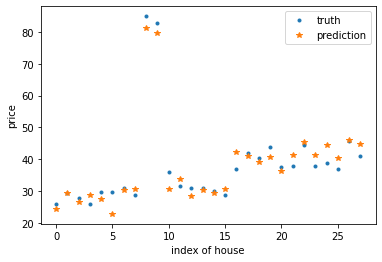

The error of linear regression is:  4.658405600809067


In [13]:
#prediction of the price with linear regression
price_predict = np.dot(theta,(np.transpose(X_factors)))

#plot true price and simulated price
index = range(rows)
plt.plot(index, price,'.',label ='truth')
plt.plot(index, price_predict,'*',label ='prediction')
plt.legend()
plt.xlabel('index of house')
plt.ylabel('price')
plt.show()
#calculate the  least squares error
error = costfunc(price_predict, price)
#the average
AE = error/rows
print('The error of linear regression is: ', AE)

[23.81674573  2.15387869]


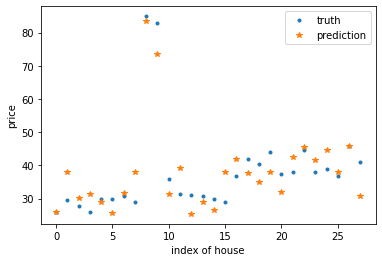

The error of linear regression is:  14.54832768072574


In [14]:
#2. use the living area to predict house price via linear regression
X2 = np.concatenate((factors[:,3:4], x_bias), axis = 1)

theta = thetaEquat(X2, price)
print(theta)

#prediction of the price with linear regression
price_predict2 = np.dot(theta,(np.transpose(X2)))

#plot true price and simulated price
index = range(rows)
plt.plot(index, price,'.',label ='truth')
plt.plot(index, price_predict2,'*',label ='prediction')
plt.legend()
plt.xlabel('index of house')
plt.ylabel('price')
plt.show()
#calculate the  least squares error
error2 = costfunc(price_predict2, price)
#the average
AE2 = error2/rows
print('The error of linear regression is: ', AE2)

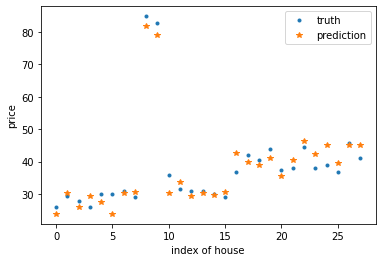

The error of linear regression is:  4.837123920413299


In [15]:
#3. use all factors except age of the house to do linear regression
x_part1 = factors[:,0:7]
x_part2 = factors[:,8:]
X3 = np.concatenate((x_part1,x_part2, x_bias), axis = 1)

#calculate theta
theta = thetaEquat(X3, price)

#prediction of the price with linear regression
price_predict3 = np.dot(theta,(np.transpose(X3)))

#plot true price and predicted price
index = range(rows)
plt.plot(index, price,'.',label ='truth')
plt.plot(index, price_predict3,'*',label ='prediction')
plt.legend()
plt.xlabel('index of house')
plt.ylabel('price')
plt.show()
#calculate the  least squares error
error3 = costfunc(price_predict3, price)
#the average
AE3 = error3/rows
print('The error of linear regression is: ', AE3)

#Question 3


1. No basis function is needed when using the locally weighted approach. The whole trend of the data distribution doesn't affect much on the prediction as the closest training data has more effect. 
2. The biggest difference is that I don't need to guess what the relationship between x and y. I have to have a good estimation of the relationship and choose proper basis function for question 1. The prediction will be poor without a good guess like my first two trys in question 1. 
In this question, I don't need to choose the basis function. But I need to set tau at a proper value. Since x and y are non-linear, I should give more weight on local value. Which means I should set tau little. The smaller of tau means the prediction relys more on nearby points. I tested when tau is 0.5, the prediction is not good. When tau is 0.1, the prediction get so much better.


In [16]:
#define a function to calculate the weights
def weights(X_train, x, tau):
  w = np.exp(-((X_train-x)[:,0]**2)/(2*tau**2))
  return w

In [17]:
#define a function to calculate theta parameter from normal equation
def thetaEquatWeights(X,y,W):
  X_T = np.transpose(X)
  XW = np.dot(X_T,W)
  X_inverse = np.linalg.pinv(np.dot(XW,X))
  theta = np.dot(np.dot(X_inverse,X_T),W)

  return  np.dot(theta,y)

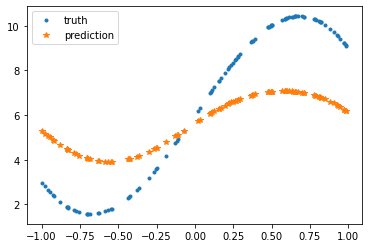

The error of linear regression is:  [3.14184124]


In [21]:
#1. try tau = 0.5 and see the prediction
#set the value of tau
tau = 0.5
# create vector x0 with value 1 for regression
x0 = np.ones((len_train, 1)) 
# concatenate x0 and x_train to make the trainxing X matrix
Xtrain = np.concatenate((x_train, x0), axis = 1)
Xtest = np.concatenate((x_test, x0), axis = 1)

thetas = np.zeros(x_train.shape[0])
ypre = np.zeros(x_train.shape[0])
W = np.identity(x_train.shape[0])
for i in range(len(x_test)):
  wi = weights(Xtrain, Xtest[i,:],tau)
  Ws = np.diag(wi)
  theta_i = thetaEquatWeights(Xtrain,y_train,Ws)
  #thetas[i] = theta_i
  ypre[i] = np.dot(theta_i, Xtest[i,:].T)

#plot truth test_y and simulated test_y
plt.plot(x_test, y_test_truth,'.',label ='truth')
plt.plot(x_test.flatten(), ypre.flatten(),'*',label ='prediction')
plt.legend()
plt.show()

#calculate the  least squares error
error = costfunc(ypre[:,None], y_test_truth)

print('The error of linear regression is: ', error/len(x_test))

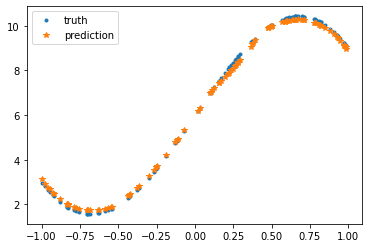

The error of linear regression is:  [0.00916085]


In [20]:
#1. try tau = 0.1 and see the prediction
#set the value of tau
tau = 0.1
# create vector x0 with value 1 for regression
x0 = np.ones((len_train, 1)) 
# concatenate x0 and x_train to make the trainxing X matrix
Xtrain = np.concatenate((x_train, x0), axis = 1)
Xtest = np.concatenate((x_test, x0), axis = 1)

thetas = np.zeros(x_train.shape[0])
ypre = np.zeros(x_train.shape[0])
W = np.identity(x_train.shape[0])
for i in range(len(x_test)):
  wi = weights(Xtrain, Xtest[i,:],tau)
  Ws = np.diag(wi)
  theta_i = thetaEquatWeights(Xtrain,y_train,Ws)
  #thetas[i] = theta_i
  ypre[i] = np.dot(theta_i, Xtest[i,:].T)

#plot truth test_y and simulated test_y
plt.plot(x_test, y_test_truth,'.',label ='truth')
plt.plot(x_test.flatten(), ypre.flatten(),'*',label ='prediction')
plt.legend()
plt.show()

#calculate the  least squares error
error = costfunc(ypre[:,None], y_test_truth)

print('The error of linear regression is: ', error/len(x_test))